<a href="https://colab.research.google.com/github/Surya-Deepak/ECG-Signal-Classification/blob/main/Generalization_of_EEG_Classification_after_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
!pip install rsfs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
import rsfs
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf

In [122]:
df=pd.read_csv("filtered_oversampled")
df = df.drop('Unnamed: 0', axis = 1)
df.iloc[336,:]

0       -2.709340
1       -2.465458
2       -1.642505
3       -1.309827
4       -1.256491
           ...   
4093     1.133715
4094     1.045535
4095     0.956086
4096     0.922903
label    1.000000
Name: 336, Length: 4098, dtype: float64

In [123]:
Data = np.loadtxt(open(str('filtered_oversampled'), "rb"), delimiter=",", skiprows=1)
labels = Data[:, -1]
Data = Data[:, :-1]
train, test, train_labels, test_labels = train_test_split(
  Data, labels, test_size=0.33, random_state=42, stratify=labels)
data_train = train
data_test = test
label_train = train_labels
label_test = test_labels
Parameters = {
  'RSFS': {
      'Classifier': 'KNN',
      'Classifier Properties': {
          'n_neighbors': 3,
          'weights': 'distance'
      },
      'Dummy feats': len(labels),
      'delta': 0.05,
      'maxiters': 300000,
      'fn': 'sqrt',
      'cutoff': 0.90,
      'Threshold': 1000,
  },
  'Verbose': 1
}
Ex_Features = rsfs.RSFS(train,test,train_labels,test_labels,Parameters)['F_RSFS'][0]
print(Ex_Features)


/home/surya/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/surya/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


RSFS:  95.0 features chosen so far (iteration:  1000 / 300000 ). Delta:  0.22018704281926316
RSFS:  143.0 features chosen so far (iteration:  2000 / 300000 ). Delta:  0.1367474016239428
RSFS:  181.0 features chosen so far (iteration:  3000 / 300000 ). Delta:  0.10438868575544358
RSFS:  175.0 features chosen so far (iteration:  4000 / 300000 ). Delta:  0.03708129913062393
[   0   11   19   32   50   52   67   89   94  132  169  193  246  252
  301  319  322  342  383  442  445  448  461  467  480  484  546  584
  602  681  713  747  788  791  792  793  814  852  872  873  891  932
  933  940  946  996  997 1006 1035 1072 1108 1128 1172 1175 1215 1234
 1281 1299 1302 1310 1328 1342 1393 1405 1406 1421 1438 1465 1468 1514
 1528 1530 1635 1640 1653 1656 1715 1767 1783 1822 1859 1872 1891 1911
 1969 1995 2050 2107 2135 2141 2155 2159 2164 2191 2214 2228 2269 2301
 2369 2396 2418 2419 2421 2473 2478 2480 2486 2495 2507 2518 2538 2550
 2591 2592 2594 2644 2743 2745 2750 2800 2802 2819 2850 28

In [124]:
X = df.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,2.641509,2.107357,1.137149,0.702993,0.678470,0.893944,1.028746,0.939439,0.709684,0.454892,...,-0.071861,-0.927039,-1.831922,-2.442566,-2.455256,-1.837458,-0.826343,0.196831,0.608747,-0.505999
1,0.162690,0.351586,0.302783,0.227500,0.155049,0.093135,0.055498,0.037604,0.031509,0.043177,...,-0.017206,-0.045408,-0.075572,-0.101415,-0.128029,-0.146166,-0.139365,-0.097704,-0.053561,-0.028506
2,-0.222344,-0.026683,0.069787,0.081497,0.052501,-0.003127,-0.063030,-0.097467,-0.108571,-0.110828,...,-0.123877,-0.131103,-0.140568,-0.149844,-0.153645,-0.151014,-0.142427,-0.123121,-0.108574,-0.127079
3,0.833018,0.886590,0.660951,0.577746,0.569451,0.577209,0.563516,0.532423,0.504991,0.491522,...,2.311592,2.312628,2.351223,2.408019,2.467500,2.518788,2.567155,2.621205,2.635644,2.292470
4,-0.590073,-0.419273,-0.220424,-0.157475,-0.151303,-0.147660,-0.137359,-0.144539,-0.177350,-0.221639,...,-2.556952,-2.577345,-2.649516,-2.741218,-2.827073,-2.898861,-2.955825,-2.998686,-2.986910,-2.542687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.352088,0.003979,0.227154,0.307414,0.327051,0.276792,0.156452,0.025378,-0.082435,-0.159385,...,-0.254504,-0.277321,-0.300341,-0.314423,-0.318894,-0.314912,-0.306385,-0.301035,-0.297741,-0.265018
796,-0.047429,-1.028869,-1.216970,-1.179560,-0.965812,-0.546358,-0.057265,0.311965,0.538229,0.686806,...,1.983949,2.006382,1.975627,1.898087,1.798108,1.740128,1.736507,1.726043,1.772896,2.008009
797,-0.914438,-0.762271,-0.505397,-0.441424,-0.468470,-0.514717,-0.521832,-0.491496,-0.453266,-0.418612,...,-0.124569,-0.118833,-0.112875,-0.101595,-0.086630,-0.075054,-0.073583,-0.081710,-0.095157,-0.119916
798,-0.555632,-0.280912,-0.218638,-0.458599,-0.834326,-1.131661,-1.168269,-0.990385,-0.748409,-0.515307,...,-0.012222,-0.087220,-0.221593,-0.360291,-0.445748,-0.457598,-0.409075,-0.326809,-0.231842,-0.032618


In [125]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
df.columns[:6000]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4088', '4089', '4090', '4091', '4092', '4093', '4094', '4095', '4096',
       'label'],
      dtype='object', length=4098)

In [126]:
y = df.iloc[:,-1]
y

0      1
1      0
2      0
3      1
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: label, Length: 800, dtype: int64

In [127]:


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (536, 4097) (536,)
Test set: (264, 4097) (264,)


In [128]:
Xrsfs = df[df.columns[list(Ex_Features)]]
Xrsfs = Xrsfs.iloc[:,:-1]
Xrsfs

# X_rsfstrain, X_rsfstest, y_rsfstrain, y_rsfstest = train_test_split( Xrsfs, y, test_size=0.33, random_state=4)
# print ('Train set:', X_rsfstrain.shape,  y_rsfstrain.shape)
# print ('Test set:', X_rsfstest.shape,  y_rsfstest.shape)



,0,11,19,32,50,52,67,89,94,132,...,3764,3800,3825,3826,3878,3899,3911,3915,3918,4025
0,2.641509,0.218331,0.630300,-0.526087,-7.318801,-9.216599,-2.143057,0.408830,0.220337,-2.697354,...,-3.928717,1.062440,1.139990,1.079187,-5.853804,-2.438283,2.347236,1.362928,0.836718,0.453579
1,0.162690,0.095793,0.055293,0.259043,-0.017925,0.066590,-0.516481,-0.373209,-0.205944,-0.131731,...,0.194799,-0.268551,-0.328409,-0.300192,0.090588,0.113622,0.099447,-0.354144,0.245705,-0.127898
2,-0.222344,-0.100985,-0.304224,-0.041180,0.174629,0.030999,0.134580,0.226519,0.299466,-0.116581,...,0.023696,0.006315,0.656157,0.543607,-0.057118,0.011965,0.241384,-0.076006,-0.161993,-0.097368
3,0.833018,0.517439,0.569016,0.861335,0.564040,0.377867,0.389081,0.644038,-3.244800,-2.211647,...,0.805421,-0.747438,0.228078,0.288553,1.473867,1.856249,-0.780703,-4.879202,-2.174349,2.567356
4,-0.590073,-0.307996,-0.174410,-0.015603,0.040876,-0.009449,-0.127133,-0.380368,-0.389072,6.232449,...,-0.396527,-0.092081,-0.207749,-0.208003,-0.226364,-0.250050,-0.284305,-0.565795,-0.852308,-2.115264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.352088,-0.213895,-0.060179,0.171171,0.400655,0.221459,0.266793,0.224545,0.310828,-1.109692,...,-0.087990,0.308253,0.708992,0.668569,0.432583,0.390292,0.068337,-0.831677,-2.023361,0.245159
796,-0.047429,0.965308,1.542031,-0.881595,1.294474,-0.389539,0.609305,0.023368,0.247116,-1.531240,...,-0.772462,-1.100832,-1.723963,-1.830763,-0.136886,-0.197391,-0.650598,0.959088,2.182654,2.039299
797,-0.914438,-0.367723,-0.148691,-0.087929,0.234288,0.250484,-0.233588,1.149279,1.437334,0.158423,...,0.038805,-0.924535,-0.637091,-0.587821,-0.459077,0.858531,1.692344,1.516320,1.149390,-0.660871
798,-0.555632,-0.132960,-0.002791,-1.393683,0.656277,-0.037435,0.387557,-0.507552,0.101111,-0.158699,...,0.225382,0.028562,-0.858336,-0.704468,0.707804,-0.021864,0.579586,0.656145,-0.066725,-0.491734


In [79]:
Xrsfs

,14,30,49,51,69,122,128,142,229,243,...,3594,3603,3619,3620,3654,3691,3809,3896,3898,3908
0,0.498948,-0.195199,-3.405141,-9.398462,-1.993727,2.244024,-10.336396,-2.593801,0.310802,2.250830,...,2.554260,2.349672,-7.520081,-7.195850,2.716651,-3.033347,2.093906,-0.326076,-1.998844,1.460120
1,0.198136,0.403146,-0.048140,0.031889,-0.198486,-0.088664,-0.049592,0.089234,0.031145,-0.090168,...,0.150428,0.154961,0.119850,0.112442,-0.096898,-0.178162,-0.432176,0.248611,0.137410,0.772440
2,-0.113794,-0.296838,0.195100,0.102474,0.373035,-0.090549,0.085310,-0.260600,-0.129712,-0.094669,...,-0.195846,0.115736,-0.035348,-0.057248,0.385030,0.179211,-0.001157,-0.129128,-0.008666,0.260807
3,0.591215,0.919292,0.508687,0.475102,0.515446,-2.137706,-1.185995,-0.655230,-0.592813,-1.728108,...,0.617440,0.659982,0.959259,0.914506,0.486992,0.557473,-0.767004,1.923932,1.832825,3.091393
4,-0.326311,0.005580,0.045899,0.022516,-0.228750,-0.515842,2.661525,1.973427,-0.619923,-0.545723,...,-0.381637,-0.554595,-0.829816,-0.870159,-0.071663,-0.754921,-0.153222,-0.353502,-0.301411,-0.246778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.046286,0.092744,0.453149,0.283538,0.356505,-1.993678,-0.964436,-0.202668,0.246331,-1.259715,...,0.480520,0.390796,0.262882,0.250859,0.160503,0.234760,0.410997,0.297450,0.342837,0.590137
796,0.836171,-1.869054,1.901112,0.287538,0.111403,0.914388,1.457597,0.776562,2.673199,-0.382248,...,-2.713003,-0.493205,1.649948,1.565199,0.809653,-1.637740,0.499352,-1.509028,-0.587506,0.044891
797,-0.198571,0.058379,0.162500,0.254401,-0.281393,0.077532,-0.025651,-0.089484,0.955193,0.489392,...,0.290888,0.479752,0.059709,0.094411,-0.794964,-0.176052,-0.456824,1.268907,1.016561,1.905251
798,0.096568,-0.720376,0.802486,0.250282,0.231790,-0.029007,0.767498,-0.220848,0.680074,-1.161679,...,0.052665,0.132573,-0.357713,-0.380698,-1.047853,-0.865809,0.501079,-0.557679,-0.105345,-0.256393


## With all features

In [80]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('LR', LogisticRegression()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')))
models.append(('xgb', XGBClassifier()))
models.append(('sgd', SGDClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
acc = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	acc.append(cv_results.mean())
	print(msg)

/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

LR: 0.991250 (0.009763)
ADAB: 0.988750 (0.011792)
RF: 0.996250 (0.005728)


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/surya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb: 0.988750 (0.008750)
sgd: 0.981250 (0.020349)
LDA: 0.948750 (0.024012)
KNN: 0.941250 (0.030644)
CART: 0.928750 (0.039151)
NB: 0.915000 (0.022913)
SVM: 0.995000 (0.008292)


## with rsfs features

In [220]:
# prepare configuration for cross validation test harness
seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt'))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn


# LogisticRegression(random_state=101),AdaBoostClassifier(), GaussianNB(), DecisionTreeClassifier(random_state=1234),
#                RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt'),SVC(probability=True)


















resultsrsfs = []
names = []
accrsfs = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, Xrsfs, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	accrsfs.append(cv_results.mean())
	print(msg)

SyntaxError: invalid syntax (<ipython-input-220-2d1e478335b8>, line 8)

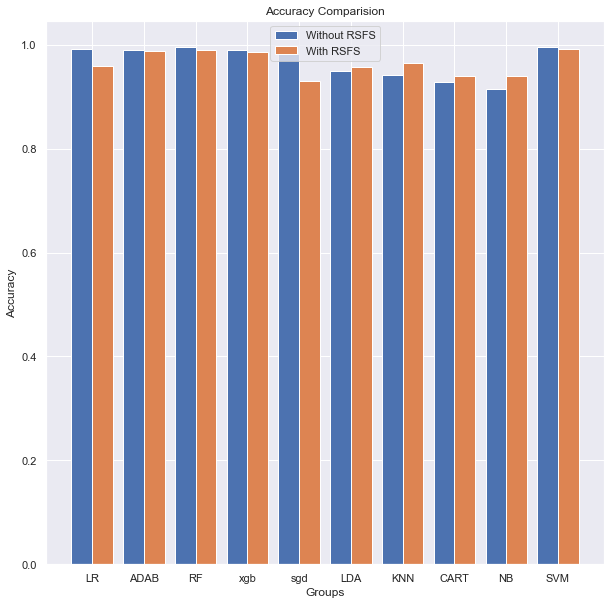

In [221]:
X = names

plt.figure(figsize = (10,10)) 
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, acc, 0.4, label = 'Without RSFS')
plt.bar(X_axis + 0.2, accrsfs, 0.4, label = 'With RSFS')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()


In [209]:
models

[('LR', LogisticRegression()),
 ('ADAB', AdaBoostClassifier()),
 ('RF', RandomForestClassifier(max_features='sqrt')),
 ('xgb',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
 ('sgd', SGDClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [85]:
accrsfs

[0.95875,
 0.9875,
 0.9887500000000001,
 0.985,
 0.9299999999999999,
 0.9575000000000001,
 0.9650000000000001,
 0.9387500000000001,
 0.93875,
 0.9925]

In [86]:
accrsfs

[0.95875,
 0.9875,
 0.9887500000000001,
 0.985,
 0.9299999999999999,
 0.9575000000000001,
 0.9650000000000001,
 0.9387500000000001,
 0.93875,
 0.9925]

In [87]:
Xrsfs['Label'] = y
Xrsfs

,14,30,49,51,69,122,128,142,229,243,...,3603,3619,3620,3654,3691,3809,3896,3898,3908,Label
0,0.498948,-0.195199,-3.405141,-9.398462,-1.993727,2.244024,-10.336396,-2.593801,0.310802,2.250830,...,2.349672,-7.520081,-7.195850,2.716651,-3.033347,2.093906,-0.326076,-1.998844,1.460120,1
1,0.198136,0.403146,-0.048140,0.031889,-0.198486,-0.088664,-0.049592,0.089234,0.031145,-0.090168,...,0.154961,0.119850,0.112442,-0.096898,-0.178162,-0.432176,0.248611,0.137410,0.772440,0
2,-0.113794,-0.296838,0.195100,0.102474,0.373035,-0.090549,0.085310,-0.260600,-0.129712,-0.094669,...,0.115736,-0.035348,-0.057248,0.385030,0.179211,-0.001157,-0.129128,-0.008666,0.260807,0
3,0.591215,0.919292,0.508687,0.475102,0.515446,-2.137706,-1.185995,-0.655230,-0.592813,-1.728108,...,0.659982,0.959259,0.914506,0.486992,0.557473,-0.767004,1.923932,1.832825,3.091393,1
4,-0.326311,0.005580,0.045899,0.022516,-0.228750,-0.515842,2.661525,1.973427,-0.619923,-0.545723,...,-0.554595,-0.829816,-0.870159,-0.071663,-0.754921,-0.153222,-0.353502,-0.301411,-0.246778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.046286,0.092744,0.453149,0.283538,0.356505,-1.993678,-0.964436,-0.202668,0.246331,-1.259715,...,0.390796,0.262882,0.250859,0.160503,0.234760,0.410997,0.297450,0.342837,0.590137,1
796,0.836171,-1.869054,1.901112,0.287538,0.111403,0.914388,1.457597,0.776562,2.673199,-0.382248,...,-0.493205,1.649948,1.565199,0.809653,-1.637740,0.499352,-1.509028,-0.587506,0.044891,1
797,-0.198571,0.058379,0.162500,0.254401,-0.281393,0.077532,-0.025651,-0.089484,0.955193,0.489392,...,0.479752,0.059709,0.094411,-0.794964,-0.176052,-0.456824,1.268907,1.016561,1.905251,1
798,0.096568,-0.720376,0.802486,0.250282,0.231790,-0.029007,0.767498,-0.220848,0.680074,-1.161679,...,0.132573,-0.357713,-0.380698,-1.047853,-0.865809,0.501079,-0.557679,-0.105345,-0.256393,1


In [88]:
Xrsfs.to_csv("Extracted Features.csv")

In [284]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import metrics

In [285]:
df=pd.read_csv("Extracted Features.csv")
df

,Unnamed: 0,14,30,49,51,69,122,128,142,229,...,3603,3619,3620,3654,3691,3809,3896,3898,3908,Label
0,0,0.498948,-0.195199,-3.405141,-9.398462,-1.993727,2.244024,-10.336396,-2.593801,0.310802,...,2.349672,-7.520081,-7.195850,2.716651,-3.033347,2.093906,-0.326076,-1.998844,1.460120,1
1,1,0.198136,0.403146,-0.048140,0.031889,-0.198486,-0.088664,-0.049592,0.089234,0.031145,...,0.154961,0.119850,0.112442,-0.096898,-0.178162,-0.432176,0.248611,0.137410,0.772440,0
2,2,-0.113794,-0.296838,0.195100,0.102474,0.373035,-0.090549,0.085310,-0.260600,-0.129712,...,0.115736,-0.035348,-0.057248,0.385030,0.179211,-0.001157,-0.129128,-0.008666,0.260807,0
3,3,0.591215,0.919292,0.508687,0.475102,0.515446,-2.137706,-1.185995,-0.655230,-0.592813,...,0.659982,0.959259,0.914506,0.486992,0.557473,-0.767004,1.923932,1.832825,3.091393,1
4,4,-0.326311,0.005580,0.045899,0.022516,-0.228750,-0.515842,2.661525,1.973427,-0.619923,...,-0.554595,-0.829816,-0.870159,-0.071663,-0.754921,-0.153222,-0.353502,-0.301411,-0.246778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,-0.046286,0.092744,0.453149,0.283538,0.356505,-1.993678,-0.964436,-0.202668,0.246331,...,0.390796,0.262882,0.250859,0.160503,0.234760,0.410997,0.297450,0.342837,0.590137,1
796,796,0.836171,-1.869054,1.901112,0.287538,0.111403,0.914388,1.457597,0.776562,2.673199,...,-0.493205,1.649948,1.565199,0.809653,-1.637740,0.499352,-1.509028,-0.587506,0.044891,1
797,797,-0.198571,0.058379,0.162500,0.254401,-0.281393,0.077532,-0.025651,-0.089484,0.955193,...,0.479752,0.059709,0.094411,-0.794964,-0.176052,-0.456824,1.268907,1.016561,1.905251,1
798,798,0.096568,-0.720376,0.802486,0.250282,0.231790,-0.029007,0.767498,-0.220848,0.680074,...,0.132573,-0.357713,-0.380698,-1.047853,-0.865809,0.501079,-0.557679,-0.105345,-0.256393,1


In [286]:
df = df.drop('Unnamed: 0', axis = 1)

In [287]:
df

,14,30,49,51,69,122,128,142,229,243,...,3603,3619,3620,3654,3691,3809,3896,3898,3908,Label
0,0.498948,-0.195199,-3.405141,-9.398462,-1.993727,2.244024,-10.336396,-2.593801,0.310802,2.250830,...,2.349672,-7.520081,-7.195850,2.716651,-3.033347,2.093906,-0.326076,-1.998844,1.460120,1
1,0.198136,0.403146,-0.048140,0.031889,-0.198486,-0.088664,-0.049592,0.089234,0.031145,-0.090168,...,0.154961,0.119850,0.112442,-0.096898,-0.178162,-0.432176,0.248611,0.137410,0.772440,0
2,-0.113794,-0.296838,0.195100,0.102474,0.373035,-0.090549,0.085310,-0.260600,-0.129712,-0.094669,...,0.115736,-0.035348,-0.057248,0.385030,0.179211,-0.001157,-0.129128,-0.008666,0.260807,0
3,0.591215,0.919292,0.508687,0.475102,0.515446,-2.137706,-1.185995,-0.655230,-0.592813,-1.728108,...,0.659982,0.959259,0.914506,0.486992,0.557473,-0.767004,1.923932,1.832825,3.091393,1
4,-0.326311,0.005580,0.045899,0.022516,-0.228750,-0.515842,2.661525,1.973427,-0.619923,-0.545723,...,-0.554595,-0.829816,-0.870159,-0.071663,-0.754921,-0.153222,-0.353502,-0.301411,-0.246778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.046286,0.092744,0.453149,0.283538,0.356505,-1.993678,-0.964436,-0.202668,0.246331,-1.259715,...,0.390796,0.262882,0.250859,0.160503,0.234760,0.410997,0.297450,0.342837,0.590137,1
796,0.836171,-1.869054,1.901112,0.287538,0.111403,0.914388,1.457597,0.776562,2.673199,-0.382248,...,-0.493205,1.649948,1.565199,0.809653,-1.637740,0.499352,-1.509028,-0.587506,0.044891,1
797,-0.198571,0.058379,0.162500,0.254401,-0.281393,0.077532,-0.025651,-0.089484,0.955193,0.489392,...,0.479752,0.059709,0.094411,-0.794964,-0.176052,-0.456824,1.268907,1.016561,1.905251,1
798,0.096568,-0.720376,0.802486,0.250282,0.231790,-0.029007,0.767498,-0.220848,0.680074,-1.161679,...,0.132573,-0.357713,-0.380698,-1.047853,-0.865809,0.501079,-0.557679,-0.105345,-0.256393,1


In [288]:
df.columns

Index(['14', '30', '49', '51', '69', '122', '128', '142', '229', '243',
       ...
       '3603', '3619', '3620', '3654', '3691', '3809', '3896', '3898', '3908',
       'Label'],
      dtype='object', length=151)

In [289]:
df = df.fillna(0)

In [290]:
df = df.sample(frac=1.0)

In [291]:
X = df[df.columns[:-1]].values
X.shape

(800, 150)

In [292]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
df.columns[:6000]

Index(['14', '30', '49', '51', '69', '122', '128', '142', '229', '243',
       ...
       '3603', '3619', '3620', '3654', '3691', '3809', '3896', '3898', '3908',
       'Label'],
      dtype='object', length=151)

In [293]:
y = df['Label'].values

y[0:5]

array([0, 0, 1, 0, 0])

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential

In [295]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
xtr,ytr,xte,yte = X_train, X_test, y_train, y_test

Train set: (536, 150) (536,)
Test set: (264, 150) (264,)


In [296]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]



In [297]:
X_train.shape

(536, 150, 1)

In [298]:
epochs = 100

In [299]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [300]:
model = Sequential()
model.add(LSTM(60,dropout = 0.2, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy','mae'])
print(model.summary)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4af9f0dee0>>
Epoch 1/100
17/17 [==============================] - 3s 74ms/step - loss: 0.6853 - accuracy: 0.6250 - mae: 0.4951 - val_loss: 0.6764 - val_accuracy: 0.6856 - val_mae: 0.4901
Epoch 2/100
17/17 [==============================] - 1s 54ms/step - loss: 0.6126 - accuracy: 0.7276 - mae: 0.4259 - val_loss: 0.5241 - val_accuracy: 0.7803 - val_mae: 0.3079
Epoch 3/100
17/17 [==============================] - 1s 56ms/step - loss: 0.4340 - accuracy: 0.8321 - mae: 0.3037 - val_loss: 0.3708 - val_accuracy: 0.8636 - val_mae: 0.2249
Epoch 4/100
17/17 [==============================] - 1s 59ms/step - loss: 0.4077 - accuracy: 0.8619 - mae: 0.2152 - val_loss: 0.5745 - val_accuracy: 0.7879 - val_mae: 0.2911
Epoch 5/100
17/17 [==============================] - 1s 65ms/step - loss: 0.3951 - accuracy: 0.8414 - mae: 0.2843 - val_loss: 0.3375 - val_accuracy: 0.8674 - val_mae: 0.2472
Epoch 6/100
17/17 [=================

17/17 [==============================] - 1s 55ms/step - loss: 0.1493 - accuracy: 0.9515 - mae: 0.0991 - val_loss: 0.3233 - val_accuracy: 0.9205 - val_mae: 0.0989
Epoch 48/100
17/17 [==============================] - 1s 55ms/step - loss: 0.1482 - accuracy: 0.9515 - mae: 0.0840 - val_loss: 0.1703 - val_accuracy: 0.9242 - val_mae: 0.1107
Epoch 49/100
17/17 [==============================] - 1s 55ms/step - loss: 0.1403 - accuracy: 0.9534 - mae: 0.0845 - val_loss: 0.1525 - val_accuracy: 0.9394 - val_mae: 0.0910
Epoch 50/100
17/17 [==============================] - 1s 55ms/step - loss: 0.1358 - accuracy: 0.9478 - mae: 0.0736 - val_loss: 0.1513 - val_accuracy: 0.9318 - val_mae: 0.1014
Epoch 51/100
17/17 [==============================] - 1s 56ms/step - loss: 0.1343 - accuracy: 0.9478 - mae: 0.0854 - val_loss: 0.1442 - val_accuracy: 0.9394 - val_mae: 0.0864
Epoch 52/100
17/17 [==============================] - 1s 56ms/step - loss: 0.1387 - accuracy: 0.9496 - mae: 0.0797 - val_loss: 0.3158 - va

Epoch 94/100
17/17 [==============================] - 1s 55ms/step - loss: 0.1019 - accuracy: 0.9608 - mae: 0.0675 - val_loss: 0.1683 - val_accuracy: 0.9470 - val_mae: 0.0808
Epoch 95/100
17/17 [==============================] - 1s 63ms/step - loss: 0.1449 - accuracy: 0.9440 - mae: 0.0997 - val_loss: 0.2031 - val_accuracy: 0.9242 - val_mae: 0.1335
Epoch 96/100
17/17 [==============================] - 1s 59ms/step - loss: 0.1641 - accuracy: 0.9478 - mae: 0.1095 - val_loss: 0.2038 - val_accuracy: 0.9318 - val_mae: 0.1110
Epoch 97/100
17/17 [==============================] - 1s 56ms/step - loss: 0.1487 - accuracy: 0.9515 - mae: 0.1041 - val_loss: 0.2337 - val_accuracy: 0.9205 - val_mae: 0.1046
Epoch 98/100
17/17 [==============================] - 1s 58ms/step - loss: 0.2099 - accuracy: 0.9291 - mae: 0.1248 - val_loss: 0.2941 - val_accuracy: 0.9167 - val_mae: 0.2179
Epoch 99/100
17/17 [==============================] - 1s 55ms/step - loss: 0.2361 - accuracy: 0.9347 - mae: 0.1792 - val_loss

In [301]:
test_accuracy = model.evaluate(X_train, y_train)
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(yhat_probs).astype(int)

17/17 [==============================] - 0s 14ms/step - loss: 0.1256 - accuracy: 0.9608 - mae: 0.0718


In [302]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [303]:
#accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.939394
Precision: 0.954887
Recall: 0.927007
F1 score: 0.940741


In [313]:
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auclstm = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auclstm)
# confusion matrix
tp, fn, fp, tn = confusion_matrix(y_test,yhat_classes).reshape(-1)
print(matrix)
from sklearn.metrics import roc_curve
fpr, tpr, ths = roc_curve(y_test, yhat_probs)
fpr
tpr

Cohens kappa: 0.878753
ROC AUC: 0.987183
[[127  10]
 [  4 123]]


array([0.        , 0.00729927, 0.75912409, 0.75912409, 0.77372263,
       0.77372263, 0.80291971, 0.80291971, 0.87591241, 0.87591241,
       0.91240876, 0.91240876, 0.9270073 , 0.9270073 , 0.94160584,
       0.94160584, 0.94890511, 0.94890511, 0.95620438, 0.95620438,
       0.97810219, 0.97810219, 0.98540146, 0.98540146, 0.99270073,
       0.99270073, 1.        , 1.        ])

In [ ]:
test_accuracy

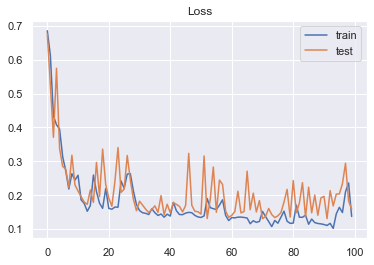

In [314]:

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training

print()
print()


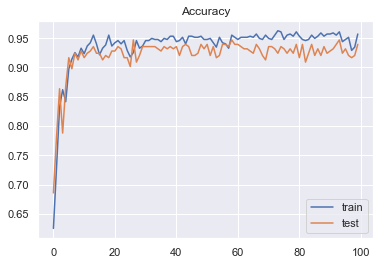

In [315]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [316]:
history.history

{'loss': [0.68526691198349,
  0.6126068830490112,
  0.43397656083106995,
  0.40767407417297363,
  0.3950556516647339,
  0.3138621151447296,
  0.27172431349754333,
  0.21819986402988434,
  0.2634156048297882,
  0.24446174502372742,
  0.25885456800460815,
  0.18619920313358307,
  0.17570479214191437,
  0.15252360701560974,
  0.1694294661283493,
  0.2593655586242676,
  0.21038563549518585,
  0.17619553208351135,
  0.16121424734592438,
  0.21928580105304718,
  0.16100464761257172,
  0.1585894078016281,
  0.16493390500545502,
  0.16459912061691284,
  0.24187523126602173,
  0.22017896175384521,
  0.2622581124305725,
  0.26359859108924866,
  0.21291911602020264,
  0.17241491377353668,
  0.1545478254556656,
  0.14817561209201813,
  0.14640825986862183,
  0.1428760439157486,
  0.1597856879234314,
  0.14822831749916077,
  0.14018847048282623,
  0.14440591633319855,
  0.13508261740207672,
  0.14393462240695953,
  0.13835285604000092,
  0.17885822057724,
  0.15397270023822784,
  0.1429174989461898

In [324]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], 
                                                    test_size=.25,
                                                    random_state=1234)
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=101),AdaBoostClassifier(), GaussianNB(),KNeighborsClassifier(), DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt'),SVC(probability=True)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels

result_table.loc[7] = ['LSTM',fpr,tpr,auclstm]
result_table.set_index('classifiers', inplace=True)













# 'LR', LogisticRegression()),
#  ('ADAB', AdaBoostClassifier()),
#  ('RF', RandomForestClassifier(max_features='sqrt')),
#  ('xgb',
#   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
#                 colsample_bynode=None, colsample_bytree=None, gamma=None,
#                 gpu_id=None, importance_type='gain', interaction_constraints=None,
#                 learning_rate=None, max_delta_step=None, max_depth=None,
#                 min_child_weight=None, missing=nan, monotone_constraints=None,
#                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
#                 random_state=None, reg_alpha=None, reg_lambda=None,
#                 scale_pos_weight=None, subsample=None, tree_method=None,
#                 validate_parameters=None, verbosity=None)),
#  ('sgd', SGDClassifier()),
#  ('LDA', LinearDiscriminantAnalysis()),
#  ('KNN', KNeighborsClassifier()),
#  ('CART', DecisionTreeClassifier()),
#  ('NB', GaussianNB()),
#  ('SVM', SVC())


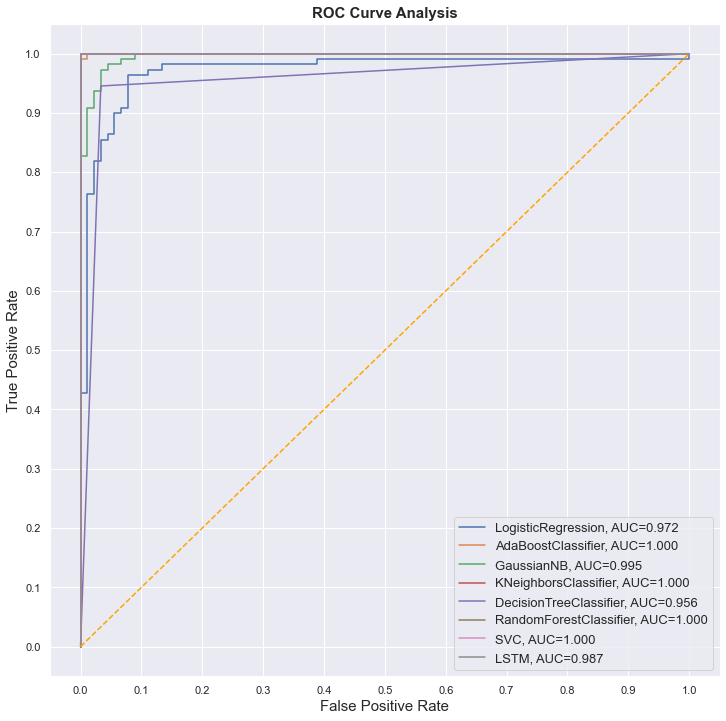

In [329]:
fig = plt.figure(figsize=(12,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [326]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...","[0.0, 0.00909090909090909, 0.42727272727272725...",0.971717
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00909090909090909, 0.19090909090909092...",0.999899
GaussianNB,"[0.0, 0.0, 0.011111111111111112, 0.01111111111...","[0.0, 0.8272727272727273, 0.8272727272727273, ...",0.995455
KNeighborsClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.7909090909090909, 0.8454545454545455, ...",1.000000
DecisionTreeClassifier,"[0.0, 0.03333333333333333, 1.0]","[0.0, 0.9454545454545454, 1.0]",0.956061
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05454545454545454, 0.13636363636363635...",1.000000
SVC,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.00909090909090909, 1.0, 1.0]",1.000000
LSTM,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.00909090909090909, 1.0, 1.0]",0.987183
